<a href="https://colab.research.google.com/github/nicholasrichers/dataviz-neuron/blob/master/Treinamento_Dataviz_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Nicholas Richers

Linkedin: https://www.linkedin.com/in/nicholas-richers/

Github: https://github.com/nicholasrichers/dataviz-neuron

# Visualização de Dados em python

Para esse treinamento é desejável que o aluno tenha conhecimentos básicos de linguagem de programação, de objetos python (listas, dicionários...) e também da biblioteca pandas.

# Importando o dataset

> Para esse treinamento, vamos usar uma base de dados de pedidos de empréstimo P2P do site [Lending Club](https://www.lendingclub.com/info/statistics.action), esse dataset já foi alvo de muitas análises no [kaggle](https://www.kaggle.com/wordsforthewise/lending-club) e até artigos acadêmicos.

Você poderá obter a versão original dos dados usando o trecho abaixo. 

```
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

!unzip LoanStats_2018Q4.csv.zip
```

Contudo, disponibilizei uma **versão limpa** desse dataset preparada para esse treinamento. Por fim há um [dicionário](https://github.com/nicholasrichers/dataviz-neuron/blob/master/dataset/LCDataDictionary.xlsx) explicando o significado de todas as colunas, mas adianto que o mesmo não será necessário, pois iremos explorar apenas a parte de visualização dos dados e um dataset relativamente grande como esse nos dará diversas opções.


In [ ]:
import pandas as pd
REPO_URL = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/Lending_club_clean_200k.csv'

df = pd.read_csv(REPO_URL, nrows=10000)

São aproximadamente 150 mil pedidos de empréstimo, contendo 88 features referente ao tomador do empréstimo.

In [ ]:
df.tail()

acc_open_past_24mths addr_state  ...  verification_status         loan_status
9995                   1.0         NY  ...      Source Verified             Current
9996                   4.0         NC  ...             Verified  Late (31-120 days)
9997                   1.0         TX  ...         Not Verified             Current
9998                   3.0         GA  ...         Not Verified             Current
9999                   1.0         AZ  ...      Source Verified             Current

[5 rows x 88 columns]

# Conhecendo as bibliotecas gráficas

Nesse treinamento falaremos de 4 bibliotecas, `matplotlib`, `seaborn`, `plotly` e `geopandas`. Apesar de serem treinamentos **indepentes**, é recomendável a um aluno iniciante que os faça na ordem proposta, devido ao nível de complexidade de cada uma.

## Matplotlib

> Vamos começar esse treinamento pela biblioteca **matplotlib**, que é biblioteca gráfica padrão do python. Essa biblioteca é conhecida por ser bastante maleável, fácil de usar e com muitas opções de configuração, contudo fazer um **gráfico** complexo e **apresentável** pode ser uma tarefa **difícil**, ou demandar **muito código**. Mesmo assim é importante conhecermos as funções básicas, bem como sua sintaxe, porque em geral as bibliotecas mais robustas como o **Seaborn** (que veremos mais adiante), **usam** o **matplotlib** debaixo dos panos.

A primeira coisa que vamos fazer é importar a biblioteca com o alias `plt` para facilitar a escrita, também faremos uso do *magic_command* abaixo para renderizar as imagens diretamente no notebook.



```
%matplotlib inline
```



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Podemos obter nosso primeiro gráfico, que representa o *limite de crédito* de ccada cliente. Com apenas **1 linha** de código e passando os parâmetros desejados nos eixos X e Y.

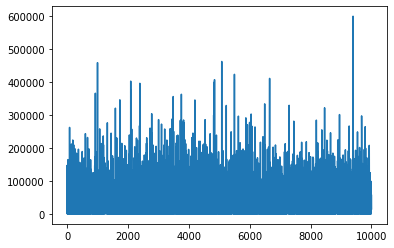

In [ ]:
plt.plot(df.index, df['total_il_high_credit_limit'])



---



---



> Para uma visualização rápida, muitas vezes pode ser o suficiente, mas se precisarmos utilizá-lo em uma apresentação, precisamos melhorar esse gráfico. De forma a facilitar o uso dos recursos do matplotlib, vamos primeiro inicializar o gráfico. Note que agora por padrão, temos duas variáveis

```
fig = "O arquivo criado em si" (imagine como .png, .svg ...)
ax = "Toda a informação contida na imagem"
```

Na prática, só iremos utilizar a variável `fig`, quando quisermos salvar a imagem. Para todo o resto utilizaremos a variável `ax`, que é uma abreviação de axis (eixo).



In [ ]:
%%capture
#Inicializando o gráfico
fig, ax = plt.subplots()

In [ ]:
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


Então a partir de agora usaremos esse padrão para as nossas imagens. Dessa forma poderemos usar outros recursos com mais facilidade.

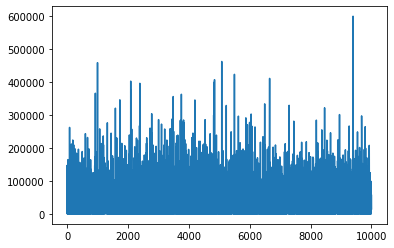

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, df['total_il_high_credit_limit'])



---



---



> Alguns recursos para melhorar a nossa imagem:

- Tamanho da figura
- Mudar a cor ([lista de cores](https://matplotlib.org/3.1.0/gallery/color/named_colors.html))
- Título
- Rótulo nos eixos
- Legenda ([Lista de posições para legenda](https://matplotlib.org/3.1.0/api/legend_api.html?highlight=legend#module-matplotlib.legend))


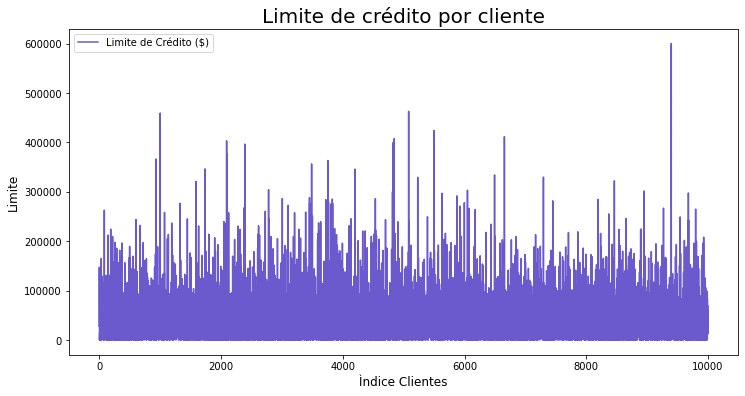

In [ ]:
#Ao inicializar a figura podemos configurar o tamanho
fig, ax = plt.subplots(figsize=(12,6))

#na linha referenta aos dados podemos definir a cor que desejamos usar
ax.plot(df.index, df['total_il_high_credit_limit'], color = "slateblue")

#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Limite de crédito por cliente', fontsize=20)

#Cria a legenda para os eixos
ax.set_ylabel('Limite', fontsize=12)
ax.set_xlabel('Ìndice Clientes', fontsize=12)

#Ao criar uma legenda podemos escolher a posicão do quadro
ax.legend(['Limite de Crédito ($)'], loc = 'upper left', fontsize=10)

Como comentado anteriormente a variável `fig` serve para manipular o arquivo, asim podemos salva a imagem com o comando abaixo.

In [ ]:
fig.savefig("minha_imagem.png")

Obs: Definir todos esse parâmetros como tamanho de fonte é um tanto verboso, porém vou mostrar uma forma mais prática de definir parâmetros apenas uma vez.



---



---



> Outro tipo de gráfico muito **fácil** de criar, especialmente quando trabalhamos com **pandas**, são os **histogramas**. No gráfico abaixo, referente ao tempo em que o cliente está empregado, vemos que há uma grande proporção de desempregados

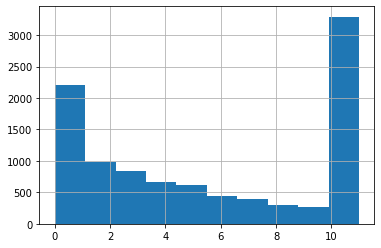

In [ ]:
df['emp_length'].hist(bins = 10)

Da maneira mostrada acima, estamos usando o pandas para chamar a [funçao](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) `pyplot.hist()` do matplotlib. Não há nenhum problema em fazer dessa forma, mas pode ser interessante comparar vários histogramas na mesma imagem.

(array([1938., 2148., 1985., 1529.,  805.,  916.,  296.,  206.,  101.,
          76.]),
 array([ 5.31 ,  7.873, 10.436, 12.999, 15.562, 18.125, 20.688, 23.251,
        25.814, 28.377, 30.94 ]),
 <a list of 10 Patch objects>)

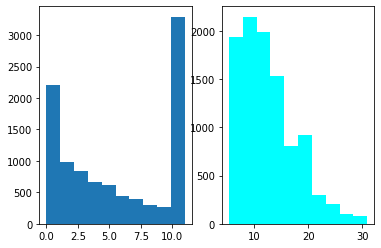

In [ ]:
#O parâmetro (1,2) indica uma dimensão 1x2, 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2)#, sharey=True, tight_layout=True)

#primeiro histograma usando ax1
ax1.hist(df['emp_length'], bins=10)

#segundo histograma usando ax2
ax2.hist(df['int_rate'], bins=10, color="cyan")

Temos vários problemas aqui nessa imagem como:


*   O **Eixo Y** dos histogramas estão desalinhados, levando a uma potencial má interpretação
*   A legenda dos histogramas está sobreposta.
*   Diversos valores na saída da célula




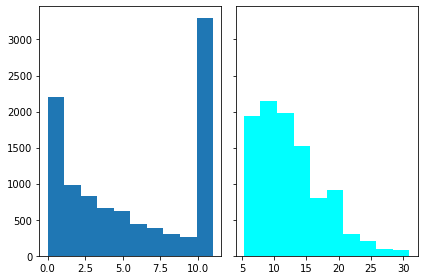

In [ ]:
#O parâmetro sharey (share Y), irá alinhar os eixos Y
#O parâmetro tight_layout irá adequar as informações entre os histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax1.hist(df['emp_length'], bins=10)

#Note que se usado aqui, apenas o primeiro histograma será impresso
#plt.show() 

ax2.hist(df['int_rate'], bins=10,  color="cyan")

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()



---



---



> A configuração dos demais parâmetros como título e legendas dos eixos funciona de maneira análoga, manpulando as variáveis `ax1` e `ax2`. Além disso, com o comando abaixo podemos ver uma lista de estilos de gráfico para arrumar o fundo e as fontes usadas, atrav´s do comando `plt.style.use('ggplot')`


```
plt.style.available
```



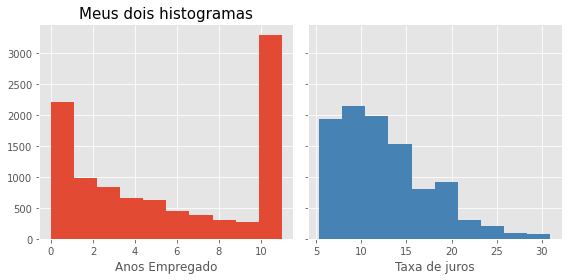

In [ ]:
#veja a lista completa com o comando acima
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8,4))

#Cria o titulo
ax1.set_title('Meus dois histogramas', fontsize=15)

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="steelblue")
ax2.set_xlabel('Taxa de juros', fontsize=12)

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()

Perceba que o título ficou desalinhado com os histogramas, desa forma tivemos que recorrer a outro [recurso](https://stackoverflow.com/questions/40936729/matplotlib-title-spanning-two-or-any-number-of-subplot-columns). Vamos imprimir o título diretamente na imagem.



```
fig.suptitle("Meus dois histogramas", fontsize='x-large')
```



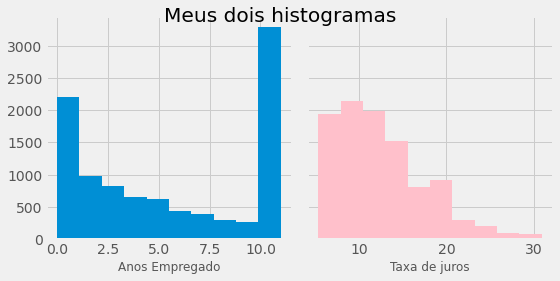

In [ ]:
#Outro estilo
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(8,4))


#Usamos o fig para imprimir o título direto no objeto imagem
fig.suptitle("Meus dois histogramas", fontsize='x-large')

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="pink")
ax2.set_xlabel('Taxa de juros', fontsize=12)

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()

> Voce pode criar um grid de imagens quiser, e de qualquer tipo assim:

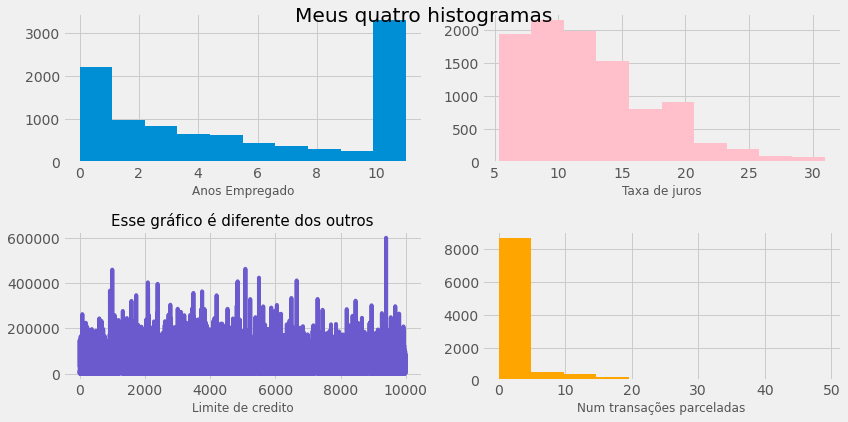

In [ ]:
#Outro estilo
plt.style.use('fivethirtyeight')
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,6))


fig.suptitle("Meus quatro histogramas", fontsize='x-large')

#Para qualquer configuração do histograma 1, devemos usar ax1
ax1.hist(df['emp_length'], bins=10)
ax1.set_xlabel('Anos Empregado', fontsize=12)


#Para qualquer configuração do histograma 2, devemos usar ax2
ax2.hist(df['int_rate'], bins=10,  color="pink")
ax2.set_xlabel('Taxa de juros', fontsize=12)


#Para qualquer configuração do histograma 3, devemos usar ax3
ax3.set_title('Esse gráfico é diferente dos outros', fontsize=15)
ax3.plot(df.index, df['total_il_high_credit_limit'], color = "slateblue")
ax3.set_xlabel('Limite de credito', fontsize=12)


#Para qualquer configuração do histograma 4, devemos usar ax4
ax4.hist(df['sec_app_open_acc'], bins=10,  color="orange")
ax4.set_xlabel('Num transações parceladas', fontsize=12)
plt.tight_layout()

#O comando abaixo forcará a impressão do gráfico e impedirá outras saídas da célula
plt.show()



---

---








> Criar vários histogramas simultâneos também pode ser bem prático em uma primeira análise.

Qtde de colunas numéricas: 76


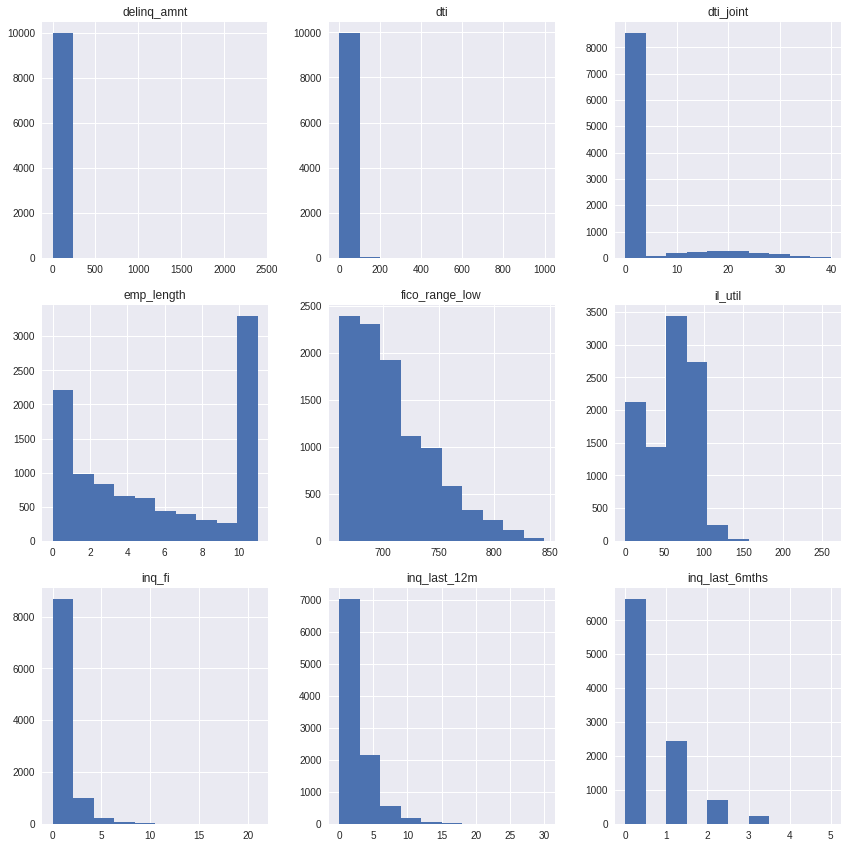

In [ ]:
#Outro estilo
plt.style.use('seaborn')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Selecionei 9 apenas por questao de espaço 
df[numeric_cols[10:19]].hist(figsize=(12,12))
print("Qtde de colunas numéricas:", len(numeric_cols))

#Para garantir o espaçamento
plt.tight_layout()
plt.show()



---


---




>  Vamos selecionar algumas variáveis categoricas para analisar. 

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['addr_state', 'application_type', 'disbursement_method',
       'earliest_cr_line', 'grade', 'home_ownership', 'initial_list_status',
       'purpose', 'sec_app_earliest_cr_line', 'term', 'verification_status',
       'loan_status'],
      dtype='object')

Temos as seguinte variáveis:



*   `grade`: Uma nota de A-G 
*   `home_ownership`: Se a sua casa é propria, alugada ou hipoteca
*   `loan_status`: Status do empréstimo (essa variável nesse caso é a que gostaríamos de prever em um eventual problema de machine learning)



In [ ]:
categorical_cols = ["grade", "home_ownership","loan_status" ]
df[categorical_cols].head()

grade home_ownership loan_status
0     D           RENT     Current
1     B            OWN     Current
2     G           RENT     Current
3     D       MORTGAGE     Current
4     A           RENT  Fully Paid

Para melhorar a nossa visualização, vamos usar também um [mapa de cores](https://matplotlib.org/tutorials/colors/colormaps.html), para garantir que o conjunto de cores selecionado seja agradável. Perceba que o mapa será usado como parâmetro mais abaixo.


`.plot.bar(colormap=cmap)`

In [ ]:
cmap = plt.cm.viridis

Agora vamos explorar alguns recursos adicionais em conjunto com o pandas e criar  gráficos iterativamente.

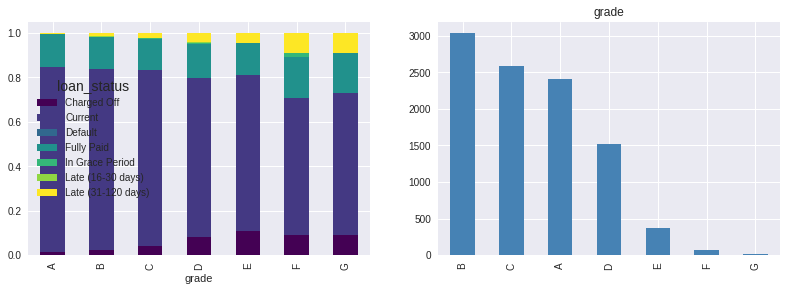

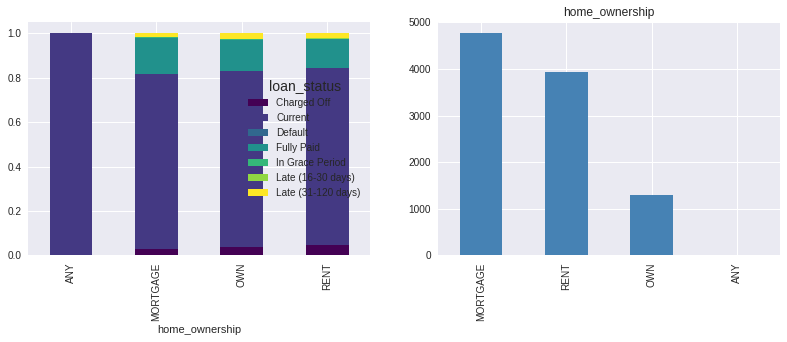

In [ ]:
for attr in ["grade", "home_ownership"]:

  #Cria Um gráfico 1X2 para attr
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

  #Agrupa o attr pelo status do empréstimo e retorna o count
  outcome_counts = df.groupby([attr, 'loan_status']).size().rename('count').reset_index()

  #Cria uma tabela com a frequencia de cada attr x loan_status
  by_outcome = outcome_counts.pivot(columns='loan_status', values='count', index=attr)

  # Plot das proporções (Stacked para empilhas as barras)
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar( stacked=True, ax=ax1, colormap=cmap);

  # Plot the counts
  df[attr].value_counts().plot.bar(ax=ax2, legend=False, color='steelblue');
  plt.title(attr);

Obs: A grande **dificuldade** em gerar esse gráfico esta na manipulação dos dados com pandas, e não com a biblioteca gráfica, contudo, outras bibliotecas como o **seaborn** oferecem opções que facilitam esse trabalho.





---



---





> Uma outra opção interessante é criar uma **terceira dimensão** para analisar o nosso gráfico. Nesse caso, além do tamanho do empréstimo e da receita anual, nos eixos X e Y, temos a taxa de juros representada pelo **colormap**.

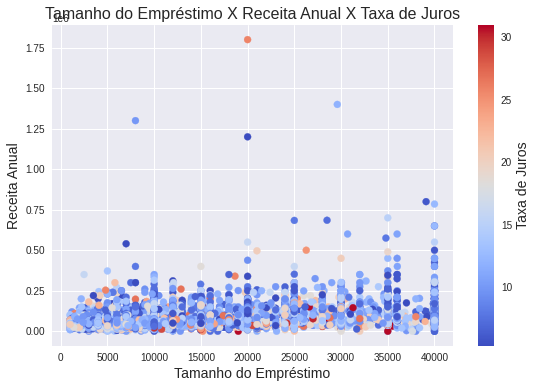

In [ ]:
fig, ax = plt.subplots()

# o parâmetro "c" define a variável da colorbar
cbar = ax.scatter(df['loan_amnt'], (df['annual_inc']),  c=df['int_rate'], cmap=plt.cm.coolwarm)


#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Tamanho do Empréstimo X Receita Anual X Taxa de Juros', fontsize=16)

#Cria a legenda para os eixos
ax.set_ylabel('Receita Anual', fontsize=14)
ax.set_xlabel('Tamanho do Empréstimo', fontsize=14)

#Cria Legenda para o color bar
label_bar = plt.colorbar(cbar)
label_bar.set_label('Taxa de Juros',fontsize=14)


plt.show()

Devido a dimensão do nosso eixo Y, a análise visual ficou um pouco prejudicada, entao é comum transformarmos a coluna com a função do numpy `log1p` que significa log(1+x), para evitar divisões por zero. De toda forma, as taxas de juros mais altas (em vermelho), parecem bem distribuídas pelo gráfico, 

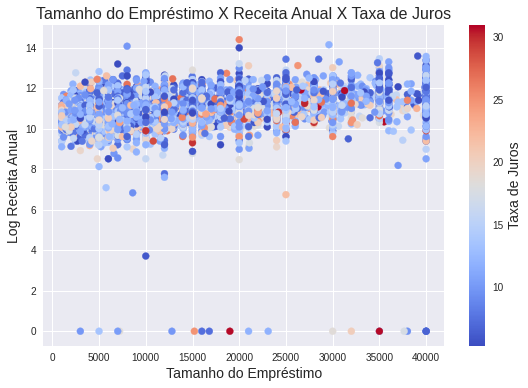

In [ ]:
import numpy as np
fig, ax = plt.subplots()

# o parâmetro "c" define a variável da colorbar
cbar = ax.scatter(df['loan_amnt'], np.log1p(df['annual_inc']),  c=df['int_rate'], cmap=plt.cm.coolwarm)


#Cria o titulo com o tamanho da fonte desejada
ax.set_title('Tamanho do Empréstimo X Receita Anual X Taxa de Juros', fontsize=16)

#Cria a legenda para os eixos
ax.set_ylabel('Log Receita Anual', fontsize=14)
ax.set_xlabel('Tamanho do Empréstimo', fontsize=14)

#Cria Legenda para o color bar
label_bar = plt.colorbar(cbar)
label_bar.set_label('Taxa de Juros',fontsize=14)

plt.show()



---



---



> Galerias de Gráficos:

[Documentação matplotlib](https://)




> **Obs: Consultar as galerias e a documentação é muito útil quando desejamos ter uma idéia para um gráfico, além de geralmente já possuírem um bom esquema de cores e etc. Assim, muitas vezes é cômodo usar essa abordagem, porém um gráfico nunca é igual ao outro, e se nao conhecermos os objetos básicos e a sintaxe apresentados aqui, teremos muita dificuldade em fazer uma modificação, mesmo que pequena e perdermos muito tempo com uma tarefa relativamente simples, então recomendo fazer uso das galerias, mas aprender bem a sintaxe da linguagem e sempre que necessário revisitar esse material.**



---



---



## Seaborn

índice


Sugestões de gráficos para o curso: 

	•	Box Plot;
	•	Gráfico violino;
	•	HeatMap;
	•	HeatMap com cluster;
	•	Gráficos de distribuição;
	•	Gráfico de superfície;
	•	Histograma 2D;
	•	Gráfico de barras circular;
	•	Sankey/ Alluvial;
	•	Gráfico em Barras;
	•	Temporal em linha;
	•	Ternário;  


## Plotly

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/700/1*t5J0wVtGJuarRinb6a0fxw.gif')

> A biblioteca Plotly é excelente para **visualização** de dados mais **complexos**, além de possuir muitas opçoes de **interatividade**.


Alguns contras:
- Como são muitos recursos, pode ser um pouco **lenta**.
- Alguns problemas de **compatibilidade** entre versões
- **Sintaxe** bem diferente das outras libs
- Se estiver na sua máquina local, de atenção ao uso de **memória ram**.



---



---



> Para agilizar a nossa análise vamos trablhar com um subconjunto dos nossos dados, porém fique a vontade caso queira trabalhar com o dataset completo. Bastando mudar `nrows=None`.

In [ ]:
import pandas as pd
REPO_URL = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/Lending_club_clean_200k.csv'

df = pd.read_csv(REPO_URL, nrows=10000)



---



---



> **Importando a biblioteca**

Diferentes versões do plotly podem causar problemas na hora de exibir os gráficos, existem formas diferentes de importar a biblioteca, caso você tenha algum problema [esse post](https://stackoverflow.com/questions/54028965/how-to-display-plotly-outputs-in-google-collaboratory-notebooks) pode te ajudar.



In [ ]:
import plotly
plotly.__version__

'4.4.1'

Da mesma forma que nas outras libs, usaremos pandas para manipular os dados, e de uma forma análoga ao matplotlib com o uso de `fig` e `axis`, responsáveis pelo arquivo e conteúdo dos gráficos, precisamos importar as duas funções abaixo.


**Offline**, irá **exibir** e salvar o **gráfico** no formato desejado e **Graph_objs** que irá controlar o **conteúdo** do gráfico.





In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
#py.init_notebook_mode(connected=False)

> Assim como nas outras bibliotecas, criar um gráfico apenas para uma visualização rápida, é bastante simples, mas é importante ter atenção a algumas **convenções** de sintaxe



```
trace = ...

data = [trace]
py.iplot(data)
```


Essa estrutura será útil para usarmos recursos mais avançados da bilioteca



---



---



> **Criando o primeiro gráfico**

O gráfico abaixo, apesar de simples já nos dá a idéia do poder das opções de **interatividade** do *plotly*. Passe o mouse sobre o gráfico e explore a barra no canto superior direito para aprender como funciona.

In [ ]:
%%time
trace = go.Scatter(x = df.index, 
                   y = df['total_il_high_credit_limit'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

CPU times: user 632 ms, sys: 54.7 ms, total: 687 ms
Wall time: 689 ms




---



---



> Quem está acostumado com as outras bibliotecas não terá dificuldade em compreender o que está sendo feito, contudo há uma diferença significativa na estrutura dessa linguagem, que usa **dicionários** como entrada para os parâmetros.


Perceba que os dados (data) do gráfico e o layout da imagem foram contruídos de manneira independente e passada como parâmetro no final da célula.



```
go.Figure(data=data, layout=layout)
```






In [ ]:
trace = go.Scatter(x = df.index,
                   y = df['total_il_high_credit_limit'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8)

#dados da imagem
data = [trace]

#layout da imagem
layout = go.Layout(title='Limite de crédito por cliente',
                   yaxis={'title':'Limite de crédito'},
                   xaxis={'title': 'Índice cliente'})

#unindo tudo
fig = go.Figure(data=data, layout=layout)

#plotando a imagem
py.iplot(fig)



---



---



> Exitem muitas alternativas de confugiração para se explorar, e sempre vale a pena observar quais as opções disponíveis.

- Com o comando `help()`, retornará uma extensa documentação
- Utilizando `?` (no google colab), abrirá uma janela no lado direito com a documentação.

In [ ]:
#help(go.Scatter())
?go.Layout()

A leitura na página da [documentação oficial](https://plotly.com/python/reference/#layout) é sempre mais agradável, contudo não perdemos tempo procurando a pagina referente ao que estamos procurando



---



---



> **Gráfico de linha**

Se quesermos mais de um objeto no mesmo gráfico, basta criar mais de um objeto trace e concatenar na lista de dados (data).

In [ ]:
# Gráfico usando apenas marcadores
trace1 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [10, 9, 11, 8, 12],
                    mode = 'lines',
                    name = 'Gráfico com linhas tracejadas',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [11, 12, 13, 14, 15],
                    mode = 'lines',
                    name = 'Gráfico com linha pontilhada',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
data = [trace1, trace2]
py.iplot(data)



---



---



> **Gráfico de bolhas**

O gráfico de bolhas também pode ser uma boa ferramenta de visualização. Com apenas um gráfico conseguimos disponibilizar informações de até 5 features. Repare também que mudamos a escala do eixo x, para logaritma para melhorar a visualização.

**Obs: Passe o mouse por cima da bolha para ver mais informações sobre a amostra específica.**

In [ ]:
#A função express do plotly é ideial para visualizações rápidas
import plotly.express as px
fig = px.scatter(df, x="revol_bal", y="annual_inc", 
	         size="int_rate", color="loan_status",
                 hover_name="purpose", log_x=True, size_max=20)
fig.show()



---



---



> **Cores & gráfico boxplot**

Faz parte da construção de um bom gráfico, montar uma paleta de cores consistente, mas existem diversas ferramentas como o `colormap` que nos retorna uma lista de cores adequada, mas há opções para criarmos e visualizarmos a nossa própria paleta.


- Site com hexadecimal de diversas cores:
https://flatuicolors.com/


- Site para visualizar sua paleta de cores
https://projects.susielu.com/viz-palette


A partir dos 2 sites acima, criei uma lista de cores em hexadecimal numa lista.

In [ ]:
cores = ["#ffd700",
"#ffb14e",
"#fa8775",
"#ea5f94",
"#cd34b5",
"#9d02d7",
"#0000ff",
"#000000",
"#686de0"]

> Agora vamos construir um boxplot para entender se a taxa de juros `int_rate`, afeta no pagamento ou não do empréstimo. Vemos abaixo que as duas primeiras opções configuram que o pagamento está em dia ou ja foi quitado, e as demais que há problemas no pagamento.

In [ ]:
df['loan_status'].value_counts()

Current               7924
Fully Paid            1466
Charged Off            375
Late (31-120 days)     202
Late (16-30 days)       18
In Grace Period         14
Default                  1
Name: loan_status, dtype: int64

In [ ]:
#salvando as categorias numa lista
status_list = df['loan_status'].unique()

> Vamos criar um gráfico de maneira iterativa e com pouco código. Perceba que a nossa lista de cores e status são iteradas dentro do loop.

In [ ]:
data=[]
for cor, status in enumerate(status_list):

  # Gerando gráficos para cada status de pgto.
  trace = go.Box(y = df.loc[df['loan_status'] == status]['int_rate'],
                  name = status,
                  marker = {'color': cores[cor]})

  data.append(trace)


#Criando do layout da imagem
layout = go.Layout(title = 'Status do empréstimo por taxa de juros',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Status'},
                   yaxis = {'title': 'Taxa de Juros'},
                   paper_bgcolor = 'rgb(243, 243, 243)', #também podemos usar RGB na imagem
                   plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Podemos concluir a partir da mediana da taxa de juros (passe o mouse por cima do boxplot), que os empréstimos sem problemas de pgto (Current e Fully Paid), possuem em média taxas de juros mais baixas.

**Obs: Preceba que você pode ocultar alguns dos boxplots que não são úteis para a sua análise clicando na tabela do lado direito. Aproveite para ocultar a opção `Default`.**

In [ ]:
#Para ficar claro como dados são manipulados dentro do loop, mude a variável `== "status"`
df.loc[df['loan_status'] == "Current"]['int_rate']

0       20.39
1        9.92
2       30.79
3       21.85
5       20.39
        ...  
9994     7.34
9995     6.71
9997     5.31
9998     6.07
9999     5.31
Name: int_rate, Length: 7924, dtype: float64

> Há também a opção de plotar as amostras individualmente em pontos, com a opção `boxpoints`

In [ ]:
data=[]

good_loans = ["Current", "Fully Paid"]

for cor, status in enumerate(good_loans):

  # Gerando gráficos para cada status de pgto.
  trace = go.Box(y = df.loc[df['loan_status'] == status]['int_rate'],
                  name = status,
                  boxpoints = "all",
                  jitter = 0.2,
                  pointpos = -1.5,
                  marker = {'color': cores[cor]})

  data.append(trace)

layout = go.Layout(title = 'Status do empréstimo por taxa de juros',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Status'},
                   yaxis = {'title': 'Taxa de Juros'},
                   paper_bgcolor = 'rgb(243, 243, 243)', #também podemos usar RGB na imagem
                   plot_bgcolor = 'rgb(243, 243, 243)')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



---



---



> **Gráficos de barra**

Podemos criar gráficos de barra muito facilmente, segundo os parâmetros abaixo.

In [ ]:
trace = go.Bar(x = ['Vôlei', 'Basquete', 'Futebol'],
               y = [100, 200, 300])
data = [trace]
py.iplot(data)

> Para duas **barras paraleas**, basta criar novamente um gráfico de barras, como vimos no gráfico de linhas. Porém como o nosso exemplo, como há várias *categorias* de `loan_status`, fica mais fácil trabalhar de maneira iterativa.

In [ ]:
data=[]

#lista com os ragrade de A-G
grades_list = sorted(df["grade"].unique())

#note que usamos a lista de status do gráfico de boxplot
for i, status in enumerate(status_list):

  # Gerando uma tabela provisória de cada grade
  df_status = df.loc[df['loan_status'] == status]


  # Gerando gráficos para cada status de pgto.
  trace = go.Bar(y = df_status.groupby(['grade']).count()['loan_status'],
                  x = grades_list,
                  name = status,
                  marker = {'color': cores[i]})
  
  data.append(trace)


fig = go.Figure(data=data)
py.iplot(fig)

Obs: Desmarque a opção current para mehorar a visualização.



---



---



> **Barras Empilhadas**

Podemos melhorar a nossa visualização com o uso de barras emplihadas com o opção stack, no layout do gráfico.

In [ ]:
data=[]

#lista com os ragrade de A-G
grades_list = sorted(df["grade"].unique())

#note que usamos a lista de status do gráfico de boxplot
for i, status in enumerate(status_list):

  # Gerando uma tabela provisória de cada grade
  df_status = df.loc[df['loan_status'] == status]


  # Gerando gráficos para cada status de pgto.
  trace = go.Bar(y = df_status.groupby(['grade']).count()['loan_status'],
                  x = grades_list,
                  name = status,
                  marker = {'color': cores[i]})
  
  data.append(trace)


layout = go.Layout(title = 'Gráfico de barras empilhadas do <a href=\'https://plot.ly/\'>Plotly</a>',
                   xaxis = {'title': 'Grade'},
                   yaxis = {'title': 'Quantidade'},
                   barmode = 'stack') #Atenção a opção "stack"
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Obs: Interaja com as opções na barra do lado direito, passando por cima do mouse e vendo as opções.



---



---



> **Histograma**

Com esse gráfico, podemos visualizar o gráfico de barras e ao meso tempo o boxplot, visto anteriormente.

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="loan_amnt", y="total_il_high_credit_limit", color="loan_status", marginal="box",
                   hover_data=df.columns)
fig.show()



---



---



> **Pairplot**

Com o gráfico pairplot, podemos observar a correlação entre algumas features como receita anual, tempo no atual emprego e taxa de juros, em relação ao status do empréstimo.

**Obs: Utilize a ferramenta de interatividade do lado direito, e observe as categorias individualmente.**

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df,
    dimensions=["annual_inc", "emp_length", "int_rate", "revol_bal"],
    color="loan_status")
fig.show()



---



---



> **Subplots**

Assim como nas outras bibliotecas, podemos criar vários gráficos numa mesma imagem, com a função make_subplots, com [diversas opçoes](https://plotly.com/python/subplots/) de personalização.

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x = df.index,
                   y = df['total_il_high_credit_limit'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8),
    row=1, col=1
)



fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()



---



---



> **MAPAS**

>O plotly dá a opção de criar gráficos interativos usando mapas, a construção desse tipo de gráfico é um tanto trabalhosa, mas na próxima seção desse treinamento, veremos como criar gráficos com mapas usando a biblioteca **Geopandas**

In [ ]:
import pandas as pd
REPO_URL = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/Lending_club_clean_200k.csv'

df = pd.read_csv(REPO_URL, nrows=10000)

Para criarmos o nosso mapa, vamos adicionar algumas informações ao nosso dataset, que nese caso é a regiao onde cada erstado está inserido.

In [ ]:
import numpy as np
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'


df['region'] = df['addr_state'].apply(finding_regions)

Agora vamos manipular o nosso dataframe para gerar a tabela que será usada no gráfico.

In [ ]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()


state_codes  issued_loans  interest_rate  annual_income
0          IL     6210175.0          12.71       80371.82
1          IN     2706250.0          12.01       65320.99
2          KS     1453900.0          12.15       72633.30
3          MI     3898600.0          12.32       73988.25
4          MN     2989675.0          12.08       71351.41

Gerando o gráfico

In [ ]:
%%time
# Now it comes the part where we plot out plotly United States map
import plotly.offline as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

CPU times: user 444 ms, sys: 29.9 ms, total: 474 ms
Wall time: 485 ms




---



---



[Documentação](https://plotly.com/python/) da biblioteca é sempre o melhor ponto de partida para ter uma boa idéia e nao precisar comecar do zero, mas é sempre importante entender o que cada elemento está fazendo, para podermos adaptar para o nosso estudo de caso.

Outras fontes:

https://medium.com/plotly/introducing-plotly-express-808df010143d

https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners#INTRODUCTION

https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics/data



---



---



## GeoPandas

> Infelizmente o conjunto de dados que usamos até aqui, nos fornece apenas o estado de residência do cliente, sem especificar a cidade, então, para esse treinamento de visualizacao de dados geoespaciais, vamos usar um novo conjunto de dados mais aproproriado para essa tarefa.

Antes de começamos, precisamos instalar duas novas bibliotecas.

In [ ]:
%%capture
!pip install geopandas

Além disso, vamos clonar o [repositorio](https://github.com/nicholasrichers/dataviz-neuron) git, onde estão salvos os nossos arquivos `.shp` com os mapas.

In [ ]:
!git clone https://github.com/nicholasrichers/dataviz-neuron

In [ ]:
import geopandas as gpd
import pandas as pd



---



---



> **Importando os dados**

Nesse treinamento vamos usar um conjunto de dados de imóveis para locação e venda, disponibilizado na url abaixo.

In [ ]:
dados_url = 'https://raw.githubusercontent.com/nicholasrichers/dataviz-neuron/master/dataset/dados.txt'

dados = pd.read_table(dados_url)
dados.head()

Area                    Bairro  ... Transacao    Valor
0   138  Recreio dos Bandeirantes  ...     Venda  1095000
1   133   Freguesia (Jacarepaguá)  ...     Venda   650000
2    46                   Pilares  ...     Venda   150000
3    65           Barra da Tijuca  ...     Venda   430000
4    85                     Gávea  ...     Venda  1800000

[5 rows x 13 columns]

Note que esse dataset já contém a **latitude e longitude** do imóvel, o que facilida bastante o nosso trabalho e assim poderemos a partir dele, construir nossas análises geoespaciais.

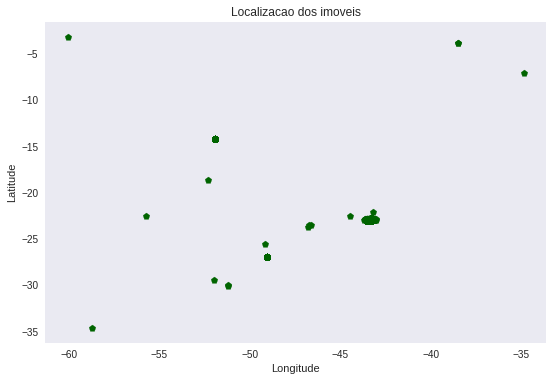

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dados.Longitude,
            dados.Latitude,
            c="darkgreen",
            marker='p')


plt.title("Localizacao dos imoveis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

> Contudo, é necessário relizar algumas **transformações** no nosso **sistema de coordedanas**, de forma que o **Geopandas** possa compreendê-lo e usá-lo em conjunto de mapas no formato de camadas.


Para isso devemos transformar as colunas referentes as coordenadas em uma lista do tipo `geometry.point`, no formato `(long, lat)`, como vemos abaixo. Usamos o tipo `Point`, pois o imóvel representa apenas um ponto no mapa que estamos contruindo. Falaremos sobre outros tipos mais adiante.

In [ ]:
from shapely.geometry import Point

In [ ]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [ ]:
geometry

Agora iremos salvar os nossos dados em um dataframe do tipo `GeoDataFrame`. Além disso, para salvar os dados nesse tipo, precisamos atribuir um sistema de coordenadas `crs`, por hora iremos usar o crs usado em sistemas de GPS, WGS84, não se preocupe, pois iremos modificá-lo mais adiante.

In [ ]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}


geo_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)

In [ ]:
geo_dados.head()

Area                    Bairro  ...    Valor                     geometry
0   138  Recreio dos Bandeirantes  ...  1095000  POINT (-43.46295 -23.01646)
1   133   Freguesia (Jacarepaguá)  ...   650000  POINT (-43.33691 -22.94320)
2    46                   Pilares  ...   150000  POINT (-43.30052 -22.87385)
3    65           Barra da Tijuca  ...   430000  POINT (-43.41270 -22.98479)
4    85                     Gávea  ...  1800000  POINT (-51.92528 -14.23500)

[5 rows x 14 columns]

In [ ]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown



---



---



> Além dos pontos, é necessário importar também o nosso **mapa**. Felizmente o [IBGE](ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/) já disponibiliza as malhas municipais em um formato próprio que o geopandas compreende. Para esse treinamento já disponibilizamos mapa apenas no município do Rio de Janeiro.

Navegue pelo menu a esquerda, e repare que dentro da pasta RJ-MUNIC há arquvios com as extensões:

- `.shp`: Contém a geometria  do polígono
- `.dbf`: Contém os atributos da geometria
- `.shx`: Junta os arquivos acima

In [ ]:
path = "/content/dataviz-neuron/dataset/"

Contudo só precisamos importar o arquivo `.shp` para obtermos o mapa. 

In [ ]:
rj = gpd.read_file(path +'Mapas/RJ-MUNIC/RJ-MUNIC.shp')
rj

ID  ...                                           geometry
0  1535  ...  MULTIPOLYGON (((692.576 7476.609, 692.572 7476...

[1 rows x 4 columns]

Perceba na coluna `geometry`, que ele é do tipo `MULTIPOLYGON`, pois se trata de um mapa como vemos abaixo.

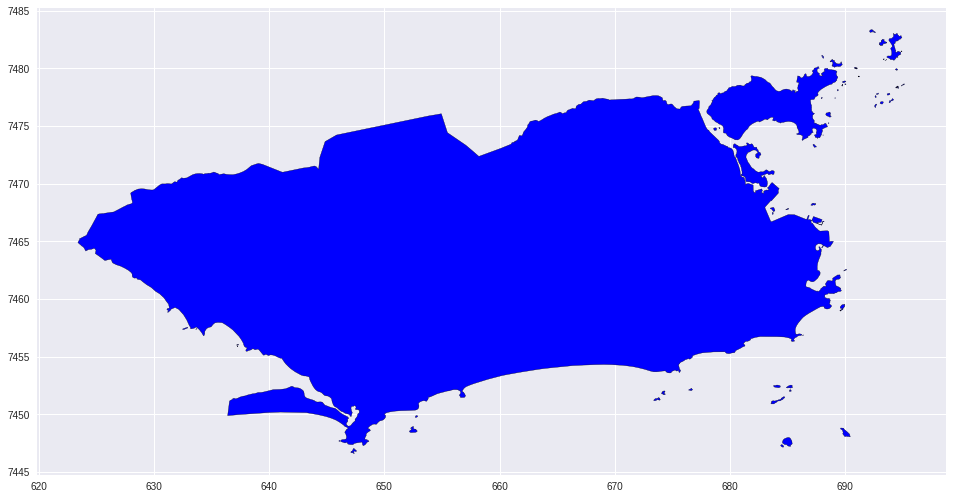

In [ ]:
rj.plot(color='blue', edgecolor='black', figsize = (15, 8))



---



---



> Agora se quisermos unir os nossos pontos referentes aos imóveis, com o nosso mapa, é importante saber que existem diversos **sistema de coordenadas** `(crs)`, utilizados no mundo, e precisamos garantir que todas as camadas de dados do nosso mapa estão alinhados.


De acordo com a [projeção UTM](https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html), no mapa abaixo, o Rio de Janeiro se encontra na posicao 23 sul. Fazendo uma busca no site [spatial reference](https://www.spatialreference.org/), por "23S", facilmente chegamos na nossa [referência](https://www.spatialreference.org/ref/epsg/31983/proj4/).


```
+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
```






![picture](https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/UTM_Brasil.png)

Agora usaremos o `crs` que copiamos em ambos os conjuntos de dados. Perceba que alteramos a unidade de distancia para `km` em `+units=km`

In [ ]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

Perceba que os dados de geolocalização dos imóveis estão numa escala diferente do `scatter_plot` anterior.

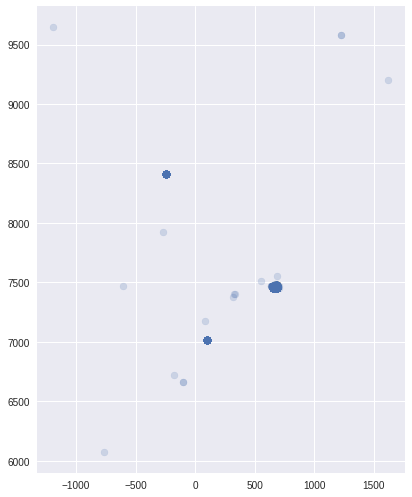

In [ ]:
geo_dados.plot(figsize=(15, 8), alpha=0.2)

> Contudo, note que há alguns poucos dados (mais transparentes), espalhados pelo mapa, pode ser um indicativo de que há pontos fora do município, provavelmente por algum erro na confecção do conjunto de dados, e teremos de removê-los, filtrando os pontos fora do nosso mapa.

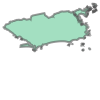

In [ ]:
rj.iloc[0].geometry

A forma de fazer a filtragem é muito semelhante ao pandas, a novidade aqui é método `.within()`, com o nosso mapa como parâmetro.

In [ ]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

Agora podemos plotar os 2 mapas de maneira sobreposta. Perceba que o parâmetro `ax`, é usado de forma similar no `matplotlib`

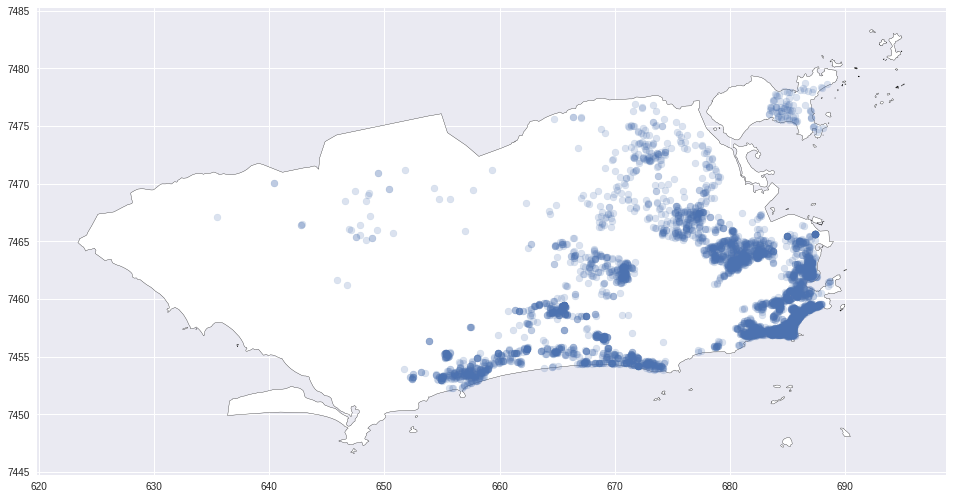

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))


geo_dados.plot(ax=base, figsize=(15, 8), alpha=0.2)



---



---



> Por fim, vamos fazer uma breve **análise de dados**, para compreendermos como dados geoespaciais podem ajudar nosso trabalho, vamos analisar a influência das [estações de metrô](http://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4) no preço dos imóveis. Felizmente temos esses dados no formato `GeoJson`, bastando clicar no link e entao escolher o formato em `API -> GeoJson`. De qualquer maneira, os dados já foram importados quando clonados o repositório.


In [ ]:
metro = gpd.read_file(path + "Transporte/Metr“/Esta‡äes_Metr“.geojson")
metro.head() #/content/dataviz-neuron/dataset/Transporte/Metr“/Esta‡äes_Metr“.geojson

OBJECTID  Cod  ... Data_Inauguracao                     geometry
0         1    1  ...             1998  POINT (-43.36485 -22.80662)
1         2    2  ...             1998  POINT (-43.35845 -22.81627)
2         3    3  ...             1998  POINT (-43.34964 -22.82452)
3         4    4  ...             1998  POINT (-43.34326 -22.83148)
4         5    5  ...             1998  POINT (-43.33386 -22.84269)

[5 rows x 23 columns]

Lembrando que precisamos alterar o `crs` para alinharmos o sistema de coordenadas, exatamente como fizemos antes.

In [ ]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

Com isso já temos mais uma camada de informações geoespaciais prontas.

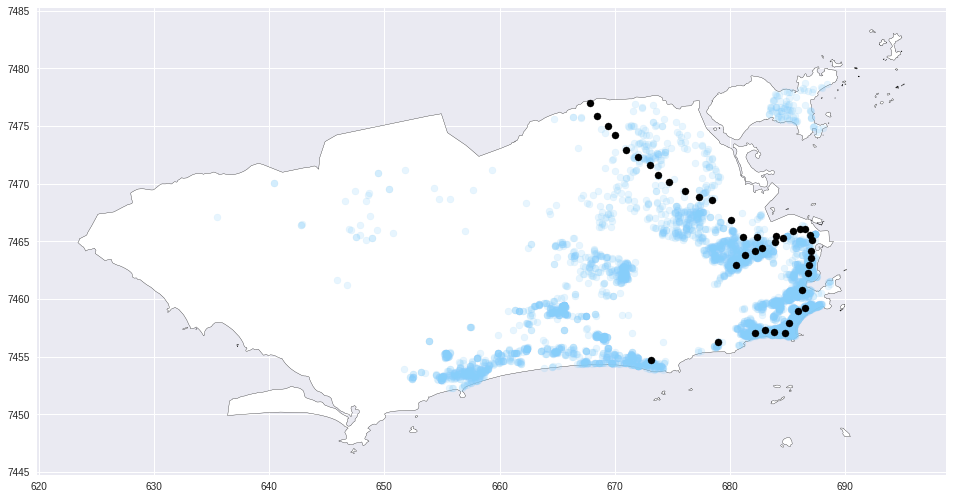

In [ ]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='lightskyblue', alpha=0.2)


metro.plot(ax=base, color='black', markersize = 50)



---



---



> Agora vamos analisar um imóvel da nossa base e calcular a distância dele para todas as outras 40 estações de metrô.

In [ ]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

Veja que calcular distâncias em linha reta, é muito simples usando o geopandas, com o método `.distance()`.

In [ ]:
metro.iloc[40]

OBJECTID                                                         41
Cod                                                              42
Nome                                                Jardim Oceânico
Flg_ATM                                                           1
Flg_Bicicletario                                                NaN
Flg_Elevador                                                      1
Flg_Linha1                                                        0
Flg_Linha2                                                        0
Obs                                                    Nova Linha 4
Flg_Ativa                                                         1
Status                                                         None
Data_Inc                                                       None
Flg_Linha4                                                        1
Integra_Trem                                                      0
Integra_Onibus                                  

In [ ]:
metro.distance(geo_dados.iloc[0].geometry)

Agora vamos criar a coluna `Dist_Metro`, repetindo a operação acima para todas as linhas `.apply()`, porém retornando apenas o menor valor `.min()`.

In [ ]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

Agora vamos analisar a **matriz de correlação**, dando atenção a linha `Valor` e observe a correlação positiva do preço com a `Area (m2)`, `Quartos`, `Suites`, e etc...

In [ ]:
geo_dados.corr()

Area  Latitude  Longitude  ...     Vagas     Valor  Dist_Metro
Area        1.000000 -0.289299   0.029982  ...  0.594699  0.724397   -0.036671
Latitude   -0.289299  1.000000   0.292822  ... -0.274707 -0.299038   -0.217864
Longitude   0.029982  0.292822   1.000000  ... -0.283960  0.191868   -0.874788
Quartos     0.681112 -0.225226  -0.016882  ...  0.520499  0.481216    0.021794
Suites      0.585817 -0.346480  -0.221548  ...  0.621140  0.464075    0.188521
Vagas       0.594699 -0.274707  -0.283960  ...  1.000000  0.456596    0.215787
Valor       0.724397 -0.299038   0.191868  ...  0.456596  1.000000   -0.195641
Dist_Metro -0.036671 -0.217864  -0.874788  ...  0.215787 -0.195641    1.000000

[8 rows x 8 columns]

Além disso observamos uma correlação negativa do preço com a distância para o metrô, como esperávamos, pois quanto mais distânte do metrô, menor o valor do imóvel.

In [ ]:
geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

-0.1956408316168679

Obs:  Mas não deixe de inferir se essa é de fato uma relação de causa e efeito, pois é possível que as estações tenham sido contruídas nessas regiões, justamente por serem as mais valorizadas, além de outras motivações.